## Plotting


Let's perform a search for gliders with the keywords UW and Scripps to get a collection of deployments in the USA west coast.

In [1]:
from gliderpy.fetchers import DatasetList

datasets = DatasetList()
search_terms = ["amelia"]
ids = datasets.get_ids(search_terms=search_terms)

print(
    f"found {len(ids)} datasets matching the search terms {search_terms} on the server {datasets.e.server}"
)

ids

found 5 datasets matching the search terms ['amelia'] on the server https://gliders.ioos.us/erddap


f:\IOOC\gliderpy\gliderpy\fetchers.py:163: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_ids = dataset_ids.append(


array(['amelia-20180501T0000', 'amelia-20200825T1929',
       'amelia-20201015T1436', 'sylvia-20200903T1327',
       'sylvia-20201015T1425'], dtype=object)

Now that we have a list of dataset ids we can choose one at random to fetch its data and plot it.

In [2]:
from gliderpy.fetchers import GliderDataFetcher

uw_grab = GliderDataFetcher()
uw_grab.fetcher.dataset_id = ids[0]

df = uw_grab.to_pandas()
df.head()

,depth,pressure,latitude,longitude,salinity,temperature,dataset_url
time,,,,,,,
2018-05-01 14:58:48+00:00,25.35,25.35,37.539598,-74.856492,32.992634,8.0939,https://gliders.ioos.us/erddap/tabledap/amelia...
2018-05-01 14:58:48+00:00,23.95,23.95,37.539598,-74.856492,32.972992,8.1080,https://gliders.ioos.us/erddap/tabledap/amelia...
2018-05-01 14:58:48+00:00,22.22,22.22,37.539598,-74.856492,32.984344,8.3210,https://gliders.ioos.us/erddap/tabledap/amelia...
2018-05-01 14:58:48+00:00,20.86,20.86,37.539598,-74.856492,32.963776,8.5911,https://gliders.ioos.us/erddap/tabledap/amelia...
2018-05-01 14:58:48+00:00,19.49,19.49,37.539598,-74.856492,32.988460,9.3318,https://gliders.ioos.us/erddap/tabledap/amelia...


At the moment `gliderpy` has two convenience functions for plotting the track and a data section. 

Text(0.5, 1.0, 'glider amelia-20180501T0000')

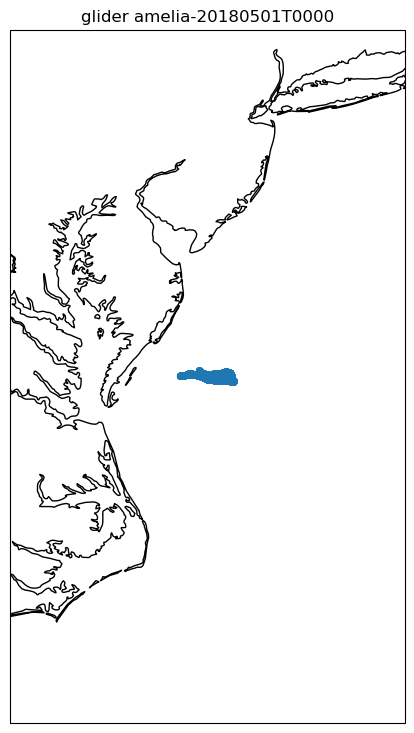

In [3]:
from gliderpy.plotters import plot_track, plot_transect

fig, ax = plot_track(df)
ax.set_title(f"glider {ids[0]}")

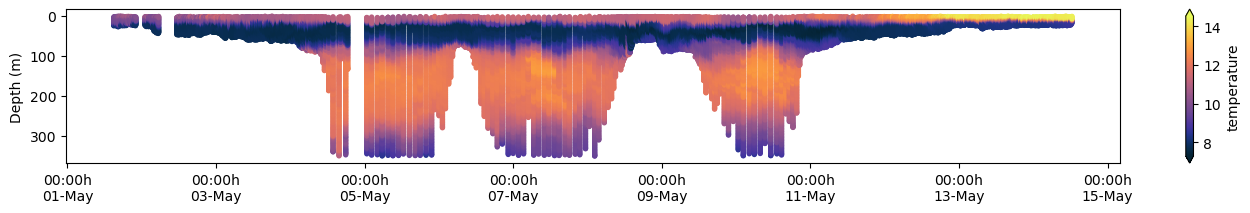

In [4]:
import palettable
from palettable.cmocean.sequential import Thermal_20

fig, ax = plot_transect(df, "temperature", cmap=Thermal_20.mpl_colormap)

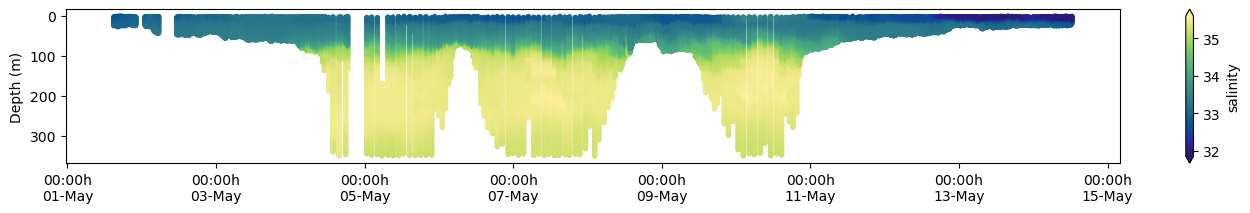

In [5]:
from palettable.cmocean.sequential import Haline_20

fig, ax = plot_transect(df, "salinity", cmap=Haline_20.mpl_colormap)